In [ ]:
#!gdown 1KZQErVGYSlcv8ukwaXUkelBYdAsKIggn
#!unzip dataset_raw_080525.zip
#!rm dataset_raw_080525.zip

Archive:  dataset_raw_080525.zip
   creating: dataset_raw/
   creating: dataset_raw/filter_long_exp/
  inflating: dataset_raw/filter_long_exp/IMG_8921.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_9034.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_8897.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_9196.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_8934.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_9037.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_8894.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_9022.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_8891.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_8918.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_8924.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_9186.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_9019.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_9025.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_9031.CR2  
  inflating: dataset_raw/filter_long_exp/IMG_9193.CR2  
  i

In [2]:
import os
from alignment import align_and_crop_raw_images

long_exp_folder = "dataset_raw/long_exp"
filter_long_exp_folder = "dataset_raw/filter_long_exp"

long_exp_fns = sorted(os.listdir(long_exp_folder))
filter_long_exp_fns = sorted(os.listdir(filter_long_exp_folder))

file_paths_pairs = [
    (f"{long_exp_folder}/{fn}", f"{filter_long_exp_folder}/{filtered_fn}")
    for fn, filtered_fn in zip(long_exp_fns, filter_long_exp_fns)
]


original_aligned_pairs = []

for (file_path, filter_file_path) in file_paths_pairs:
    result = align_and_crop_raw_images(file_path, filter_file_path)
    if result is None:
        continue
    original_aligned_pairs.append(result)


Reading dataset_raw/long_exp/IMG_8889.CR2 and dataset_raw/filter_long_exp/IMG_8888.CR2
Reading dataset_raw/long_exp/IMG_8892.CR2 and dataset_raw/filter_long_exp/IMG_8891.CR2
Reading dataset_raw/long_exp/IMG_8895.CR2 and dataset_raw/filter_long_exp/IMG_8894.CR2
Reading dataset_raw/long_exp/IMG_8898.CR2 and dataset_raw/filter_long_exp/IMG_8897.CR2
Reading dataset_raw/long_exp/IMG_8901.CR2 and dataset_raw/filter_long_exp/IMG_8900.CR2
Reading dataset_raw/long_exp/IMG_8908.CR2 and dataset_raw/filter_long_exp/IMG_8907.CR2
Reading dataset_raw/long_exp/IMG_8911.CR2 and dataset_raw/filter_long_exp/IMG_8910.CR2
Reading dataset_raw/long_exp/IMG_8915.CR2 and dataset_raw/filter_long_exp/IMG_8914.CR2
Reading dataset_raw/long_exp/IMG_8919.CR2 and dataset_raw/filter_long_exp/IMG_8918.CR2
Reading dataset_raw/long_exp/IMG_8922.CR2 and dataset_raw/filter_long_exp/IMG_8921.CR2
Reading dataset_raw/long_exp/IMG_8925.CR2 and dataset_raw/filter_long_exp/IMG_8924.CR2
Reading dataset_raw/long_exp/IMG_8935.CR2 a

In [1]:
from alignment import align_and_crop_raw_images

original_img, filter_img = align_and_crop_raw_images(
    "dataset_raw/long_exp/IMG_8889.CR2",
      "dataset_raw/filter_long_exp/IMG_8888.CR2",
      align_intensity=False
)

Reading dataset_raw/long_exp/IMG_8889.CR2 and dataset_raw/filter_long_exp/IMG_8888.CR2


In [2]:
from matplotlib import pyplot as plt
import numpy as np

original_img = original_img['raw'].postprocess().astype(np.float32)[1200:2100, 1500:2400] / 255.0
filter_img = filter_img['raw'].postprocess().astype(np.float32)[1200:2100, 1500:2400] / 255.0

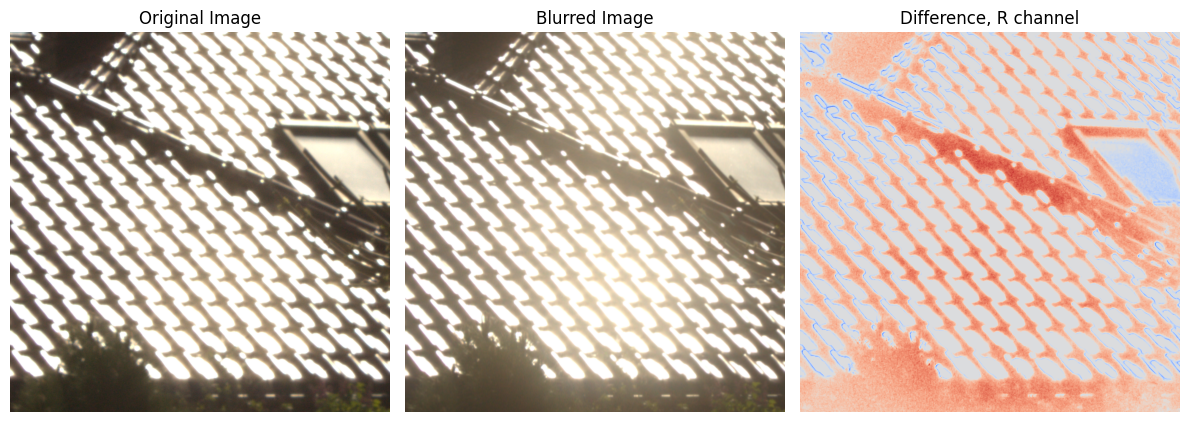

In [3]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")


plt.subplot(1, 3, 2)
plt.imshow(filter_img)
plt.title("Blurred Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow((filter_img-original_img)[:, :, 0], cmap="coolwarm")
plt.title("Difference, R channel")
plt.axis("off")


plt.tight_layout()
plt.show()

In [4]:
import torch

device = "cuda"
original_img = torch.tensor(original_img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
filter_img = torch.tensor(filter_img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)


In [12]:
from gaussian_net import GaussianNet, set_seed

set_seed(42)
net = GaussianNet(900, 900, 3, 17).to(device)

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

losses = []
num_epochs = 2000
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    blurred_img = net(original_img).to(device)
    loss = criterion(blurred_img, filter_img)
    loss.backward()
    optimizer.step()
    scheduler.step()
    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, loss: {loss.item()}")

print("Finished Training")


Epoch: 0, loss: 0.5673930644989014
Epoch: 10, loss: 0.5606215596199036
Epoch: 20, loss: 0.5537223219871521
Epoch: 30, loss: 0.5459752082824707
Epoch: 40, loss: 0.5338958501815796
Epoch: 50, loss: 0.1449093371629715
Epoch: 60, loss: 0.14458322525024414
Epoch: 70, loss: 0.1453220546245575
Epoch: 80, loss: 0.13420434296131134
Epoch: 90, loss: 0.08689342439174652
Epoch: 100, loss: 0.0792001336812973
Epoch: 110, loss: 0.06853055953979492
Epoch: 120, loss: 0.061251476407051086
Epoch: 130, loss: 0.057186558842659
Epoch: 140, loss: 0.05347621068358421
Epoch: 150, loss: 0.0493210107088089
Epoch: 160, loss: 0.04558101296424866
Epoch: 170, loss: 0.04275720193982124
Epoch: 180, loss: 0.03984943777322769
Epoch: 190, loss: 0.03806397318840027
Epoch: 200, loss: 0.03682445362210274
Epoch: 210, loss: 0.03574866056442261
Epoch: 220, loss: 0.03482309728860855
Epoch: 230, loss: 0.03399800881743431
Epoch: 240, loss: 0.03323382884263992
Epoch: 250, loss: 0.03245318681001663
Epoch: 260, loss: 0.0318170562386

KeyboardInterrupt: 

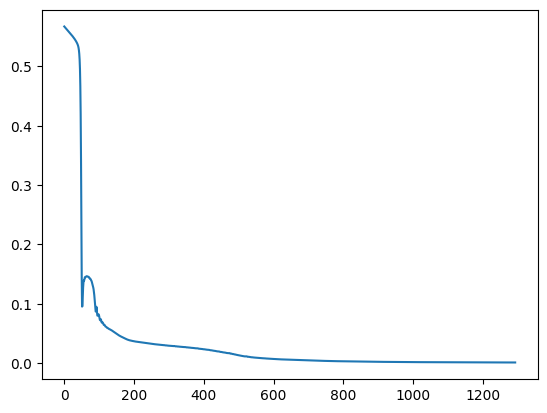

In [15]:
plt.plot(losses)

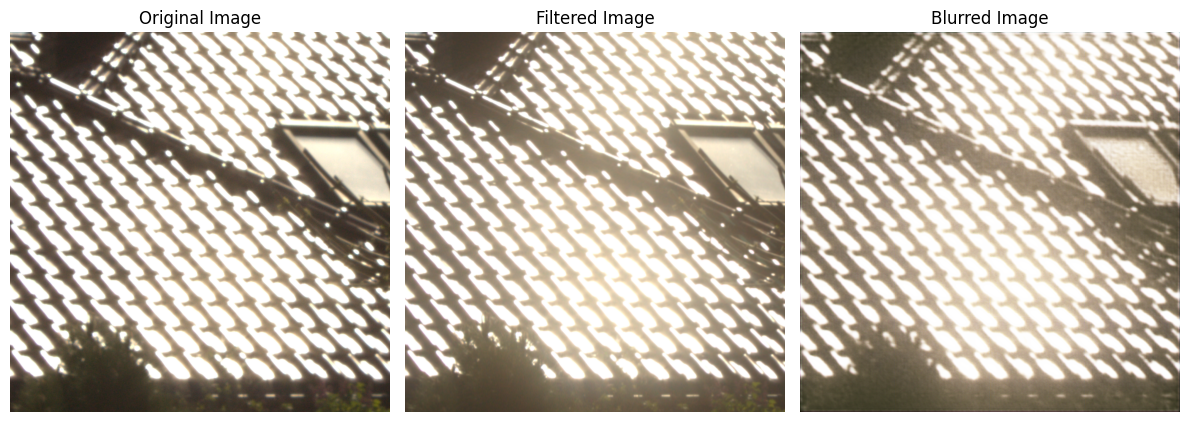

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_img.squeeze().permute(1, 2, 0).cpu().numpy())
plt.title("Original Image")
plt.axis("off")


plt.subplot(1, 3, 2)
plt.imshow(filter_img.squeeze().permute(1, 2, 0).cpu().numpy())
plt.title("Filtered Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(blurred_img.squeeze().detach().permute(1, 2, 0).cpu().numpy())
plt.title("Blurred Image")
plt.axis("off")


plt.tight_layout()
plt.show()